In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import MinMaxInterval
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout

## Reading a FITS file

In [1]:
img_path = '/home/viviane/BLF_training/Images/EUC_J/imageEUC_J-200001.fits'
fits.info(img_path)

NameError: name 'fits' is not defined

In [3]:
### using fits.getdata() --> np array
img_data = fits.getdata(img_path, ext=0)
print(img_data)

[[-9.76715930e-12  5.15664941e-12  1.09206437e-11 ... -5.59254899e-12
  -3.11408560e-12  4.89244192e-12]
 [-1.53540358e-11  1.29798325e-11 -2.45361175e-12 ...  7.96089583e-12
  -1.83813902e-11 -2.78579763e-12]
 [ 1.88017896e-12  9.41518478e-12  6.43359443e-13 ...  9.76120226e-13
   5.17626610e-12 -4.57186676e-12]
 ...
 [-6.50529934e-12  1.61818284e-11  7.76066971e-12 ... -5.27057131e-12
   5.44669128e-12  9.69319460e-13]
 [ 1.20240528e-11 -1.82952351e-12  2.04764972e-11 ...  1.14301635e-12
   1.23559182e-12 -1.11187286e-12]
 [ 2.80688558e-12 -8.62631754e-12  4.48427536e-12 ...  4.49563910e-12
   4.55615884e-12  3.62280019e-12]]


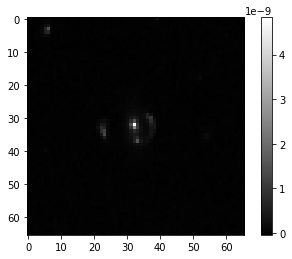

In [4]:
plt.figure()
plt.imshow(img_data, cmap='gray')
plt.colorbar()

In [5]:
# or using fits.open()  --> HDU object
hdul = fits.open(img_path)
img_data2 = hdul[0].data  # nparray
hdul[0].header
#hdul.close()

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                   66 / length of data axis 1                          
NAXIS2  =                   66 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
WCSAXES =                    2 / number of World Coordinate System axes         
CRPIX1  =                 33.5 / x-coordinate of reference pixel                
CRPIX2  =                 33.5 / y-coordinate of reference pixel                
CRVAL1  =                   0. / first axis value at reference pixel            
CRVAL2  =                   

## Creating a network

In [9]:
def get_data():
    
    blf = pd.read_csv('blf_train.csv')

    imgs = []
    for path in blf['img_path_H']:
        img_data = fits.getdata(path, ext=0)  # np array
        #img_data *= 1/img_data.max()
        imgs.append(img_data)
    imgs = np.array(imgs)

    labels = np.array(blf['n_sources'])
    
    return imgs, labels

In [130]:
#imgs, labels = get_data()
#print(imgs[77].min())
#print(imgs[77].max())

-2.4207513e-11
6.66554e-09


In [136]:
imgs, imgs_test, labels, labels_test = train_test_split(imgs, labels, test_size=0.1, random_state=42)
imgs, imgs_val, labels, labels_val = train_test_split(imgs, labels, test_size=0.30, random_state=42)
imgs = imgs.reshape(imgs.shape + (1,) )
imgs_test = imgs_test.reshape(imgs_test.shape + (1,))
imgs_val = imgs_val.reshape(imgs_val.shape + (1,))
imgs_test.shape

(9, 66, 66, 1)

In [116]:
def model():
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size = (3,3), input_shape = (66,66,1), activation = "relu"))
    model.add(Conv2D(32, kernel_size = (3,3), activation = "relu"))
    model.add(Conv2D(32, kernel_size = (3,3), activation = "relu"))
    model.add(Flatten())
    model.add(Dense(25, activation = "relu"))
    model.add(Dense(15, activation = "relu"))
    model.add(Dense(1, activation = "sigmoid"))
    
    return model

In [117]:
modelo = model()

In [118]:
#modelo.summary()

In [119]:
modelo.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [120]:
history = modelo.fit(imgs,labels, epochs=30, validation_data = (imgs_val, labels_val))

Train on 56 samples, validate on 24 samples
Epoch 1/30
56/56 [==============================] - 2s 28ms/step - loss: 0.6919 - accuracy: 0.4286 - val_loss: 0.6263 - val_accuracy: 0.7917
Epoch 2/30
56/56 [==============================] - 1s 21ms/step - loss: 0.5704 - accuracy: 0.8929 - val_loss: 0.5387 - val_accuracy: 0.7917
Epoch 3/30
56/56 [==============================] - 1s 20ms/step - loss: 0.3489 - accuracy: 0.8929 - val_loss: 0.8128 - val_accuracy: 0.7917
Epoch 4/30
56/56 [==============================] - 1s 20ms/step - loss: 0.4143 - accuracy: 0.8929 - val_loss: 0.5926 - val_accuracy: 0.7917
Epoch 5/30
56/56 [==============================] - 1s 20ms/step - loss: 0.3532 - accuracy: 0.8929 - val_loss: 0.5129 - val_accuracy: 0.7917
Epoch 6/30
56/56 [==============================] - 1s 21ms/step - loss: 0.3698 - accuracy: 0.8929 - val_loss: 0.5175 - val_accuracy: 0.7917
Epoch 7/30
56/56 [==============================] - 1s 20ms/step - loss: 0.3617 - accuracy: 0.8929 - val_loss:

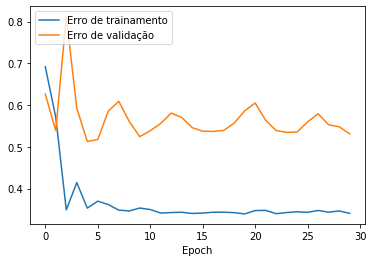

In [121]:
plt.plot(np.arange(0, 30), history.history["loss"], label = "Erro de trainamento")
plt.plot(np.arange(0, 30), history.history["val_loss"], label = "Erro de validação")
plt.xlabel("Epoch")
plt.legend(loc="upper left")
plt.show()

In [122]:
#plt.plot(np.arange(0, 30), history.history["acc"], label = "Erro de trainamento")
#plt.plot(np.arange(0, 30), history.history["val_acc"], label = "Erro de validação")
#plt.xlabel("Epoch")
#plt.legend(loc="upper left")
#plt.show()

In [144]:
def model_alt():
    
    model = Sequential()
    model.add(Conv2D(55, kernel_size = (3,3), input_shape = (66,66,1), activation = "relu"))
    model.add(Conv2D(32, kernel_size = (3,3), activation = "relu"))
    model.add(Conv2D(52, kernel_size = (3,3), activation = "relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(25, activation = "relu"))
    model.add(Dense(15, activation = "relu"))
    model.add(Dense(1, activation = "sigmoid"))
    
    return model

In [145]:
modelo_alt = model_alt()

In [146]:
modelo_alt.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
history_alt = modelo_alt.fit(imgs,labels, epochs=30, validation_data = (imgs_val, labels_val))

Train on 56 samples, validate on 24 samples
Epoch 1/30
56/56 [==============================] - 2s 41ms/step - loss: 0.6926 - accuracy: 0.4286 - val_loss: 0.6768 - val_accuracy: 0.7917
Epoch 2/30
56/56 [==============================] - 2s 30ms/step - loss: 0.6479 - accuracy: 0.8929 - val_loss: 0.5770 - val_accuracy: 0.7917
Epoch 3/30
56/56 [==============================] - 2s 30ms/step - loss: 0.4726 - accuracy: 0.8929 - val_loss: 0.5407 - val_accuracy: 0.7917
Epoch 4/30
56/56 [==============================] - 2s 30ms/step - loss: 0.3459 - accuracy: 0.8929 - val_loss: 0.8460 - val_accuracy: 0.7917
Epoch 5/30
56/56 [==============================] - 2s 30ms/step - loss: 0.4414 - accuracy: 0.8929 - val_loss: 0.7580 - val_accuracy: 0.7917
Epoch 6/30
56/56 [==============================] - 2s 30ms/step - loss: 0.3781 - accuracy: 0.8929 - val_loss: 0.5865 - val_accuracy: 0.7917
Epoch 7/30
56/56 [==============================] - 2s 30ms/step - loss: 0.3398 - accuracy: 0.8929 - val_loss:

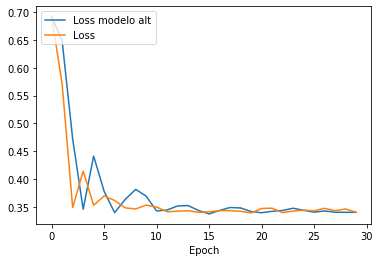

In [148]:
plt.plot(np.arange(0, 30), history_alt.history["loss"], label = "Loss modelo alt")
plt.plot(np.arange(0, 30), history.history["loss"], label = "Loss")
plt.xlabel("Epoch")
plt.legend(loc="upper left")
plt.show()

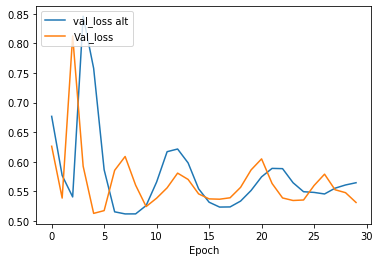

In [149]:
plt.plot(np.arange(0, 30), history_alt.history["val_loss"], label = "val_loss alt")
plt.plot(np.arange(0, 30), history.history["val_loss"], label = "Val_loss")
plt.xlabel("Epoch")
plt.legend(loc="upper left")
plt.show()